In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from plasmistry.electron import EEDF
from plasmistry.electron import get_maxwell_eedf
from plasmistry.molecule import get_ideal_gas_density

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 14

In [3]:
np.set_printoptions(precision=1, linewidth=130, edgeitems=5)
pd.options.display.float_format = '{:,.1e}'.format

### Read inelas reactions

inelas_df_forward = pd.read_pickle('rctn_dataframe_forward.pkl')
inelas_df_backward = pd.read_pickle('rctn_dataframe_backward.pkl')

inelas_df_forward.loc[0, 'cross_section']

In [47]:
# inelas_df = pd.concat([inelas_df_forward, inelas_df_backward], ignore_index=True)
# inelas_df = pd.read_pickle("rctn_dataframe_H2_dis_via_b.pkl")
# inelas_df = pd.read_pickle("CO_ele_vib_forward_df.pkl")
inelas_df = pd.read_pickle("CO_ele_vib_backward_df.pkl")

In [48]:
inelas_df

formula          type  threshold_eV  \
0        E + CO(v1) => E + CO  deexcitation      -2.7e-01   
1        E + CO(v2) => E + CO  deexcitation      -5.3e-01   
2    E + CO(v2) => E + CO(v1)  deexcitation      -2.6e-01   
3        E + CO(v3) => E + CO  deexcitation      -7.9e-01   
4    E + CO(v3) => E + CO(v1)  deexcitation      -5.2e-01   
5    E + CO(v3) => E + CO(v2)  deexcitation      -2.6e-01   
6        E + CO(v4) => E + CO  deexcitation      -1.0e+00   
7    E + CO(v4) => E + CO(v1)  deexcitation      -7.8e-01   
8    E + CO(v4) => E + CO(v2)  deexcitation      -5.1e-01   
9    E + CO(v4) => E + CO(v3)  deexcitation      -2.6e-01   
10       E + CO(v5) => E + CO  deexcitation      -1.3e+00   
11   E + CO(v5) => E + CO(v1)  deexcitation      -1.0e+00   
12   E + CO(v5) => E + CO(v2)  deexcitation      -7.7e-01   
13   E + CO(v5) => E + CO(v3)  deexcitation      -5.1e-01   
14   E + CO(v5) => E + CO(v4)  deexcitation      -2.5e-01   
15       E + CO(v6) => E + CO  deexcitation      -1.5e+00   
16   E + CO(v6) => E + CO(v1)  deexcitation      -1.3e+00   
17   E + CO(v6) => E + CO(v2)  deexcitation      -1.0e+00   
18   E + CO(v6) => E + CO(v3)  deexcitation      -7.6e-01   
19   E + CO(v6) => E + CO(v4)  deexcitation      -5.0e-01   
20   E + CO(v6) => E + CO(v5)  deexcitation      -2.5e-01   
21       E + CO(v7) => E + CO  deexcitation      -1.8e+00   
22   E + CO(v7) => E + CO(v1)  deexcitation      -1.5e+00   
23   E + CO(v7) => E + CO(v2)  deexcitation      -1.3e+00   
24   E + CO(v7) => E + CO(v3)  deexcitation      -1.0e+00   
25   E + CO(v7) => E + CO(v4)  deexcitation      -7.5e-01   
26   E + CO(v7) => E + CO(v5)  deexcitation      -5.0e-01   
27   E + CO(v7) => E + CO(v6)  deexcitation      -2.5e-01   
28       E + CO(v8) => E + CO  deexcitation      -2.0e+00   
29   E + CO(v8) => E + CO(v1)  deexcitation      -1.8e+00   
30   E + CO(v8) => E + CO(v2)  deexcitation      -1.5e+00   
31   E + CO(v8) => E + CO(v3)  deexcitation      -1.2e+00   
32   E + CO(v8) => E + CO(v4)  deexcitation      -9.9e-01   
33   E + CO(v8) => E + CO(v5)  deexcitation      -7.4e-01   
34   E + CO(v8) => E + CO(v6)  deexcitation      -4.9e-01   
35   E + CO(v8) => E + CO(v7)  deexcitation      -2.4e-01   
36       E + CO(v9) => E + CO  deexcitation      -2.3e+00   
37   E + CO(v9) => E + CO(v1)  deexcitation      -2.0e+00   
38   E + CO(v9) => E + CO(v2)  deexcitation      -1.7e+00   
39   E + CO(v9) => E + CO(v3)  deexcitation      -1.5e+00   
40   E + CO(v9) => E + CO(v4)  deexcitation      -1.2e+00   
41   E + CO(v9) => E + CO(v5)  deexcitation      -9.8e-01   
42   E + CO(v9) => E + CO(v6)  deexcitation      -7.3e-01   
43   E + CO(v9) => E + CO(v7)  deexcitation      -4.8e-01   
44   E + CO(v9) => E + CO(v8)  deexcitation      -2.4e-01   
45      E + CO(v10) => E + CO  deexcitation      -2.5e+00   
46  E + CO(v10) => E + CO(v1)  deexcitation      -2.2e+00   
47  E + CO(v10) => E + CO(v2)  deexcitation      -2.0e+00   
48  E + CO(v10) => E + CO(v3)  deexcitation      -1.7e+00   
49  E + CO(v10) => E + CO(v4)  deexcitation      -1.5e+00   
50  E + CO(v10) => E + CO(v5)  deexcitation      -1.2e+00   
51  E + CO(v10) => E + CO(v6)  deexcitation      -9.6e-01   
52  E + CO(v10) => E + CO(v7)  deexcitation      -7.2e-01   
53  E + CO(v10) => E + CO(v8)  deexcitation      -4.8e-01   
54  E + CO(v10) => E + CO(v9)  deexcitation      -2.4e-01   

                                        cross_section  
0   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
1   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
2   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
3   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
4   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
5   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
6   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
7   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
8   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
9   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,

In [49]:
inelas_df.loc[0, 'cross_section']

array([[1.0e-01, 2.0e-01, 3.0e-01, 4.0e-01, 5.0e-01, ..., 1.0e+02, 1.0e+02, 1.0e+02, 1.0e+02, 1.0e+02],
       [5.4e-21, 3.7e-21, 3.0e-21, 2.6e-21, 2.5e-21, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00]])

### Choose the reactions considered.

In [50]:
#inelas_df = inelas_df.iloc[[0,1,2,3,4,5,6,7,8]].reset_index(drop=True)
inelas_df

formula          type  threshold_eV  \
0        E + CO(v1) => E + CO  deexcitation      -2.7e-01   
1        E + CO(v2) => E + CO  deexcitation      -5.3e-01   
2    E + CO(v2) => E + CO(v1)  deexcitation      -2.6e-01   
3        E + CO(v3) => E + CO  deexcitation      -7.9e-01   
4    E + CO(v3) => E + CO(v1)  deexcitation      -5.2e-01   
5    E + CO(v3) => E + CO(v2)  deexcitation      -2.6e-01   
6        E + CO(v4) => E + CO  deexcitation      -1.0e+00   
7    E + CO(v4) => E + CO(v1)  deexcitation      -7.8e-01   
8    E + CO(v4) => E + CO(v2)  deexcitation      -5.1e-01   
9    E + CO(v4) => E + CO(v3)  deexcitation      -2.6e-01   
10       E + CO(v5) => E + CO  deexcitation      -1.3e+00   
11   E + CO(v5) => E + CO(v1)  deexcitation      -1.0e+00   
12   E + CO(v5) => E + CO(v2)  deexcitation      -7.7e-01   
13   E + CO(v5) => E + CO(v3)  deexcitation      -5.1e-01   
14   E + CO(v5) => E + CO(v4)  deexcitation      -2.5e-01   
15       E + CO(v6) => E + CO  deexcitation      -1.5e+00   
16   E + CO(v6) => E + CO(v1)  deexcitation      -1.3e+00   
17   E + CO(v6) => E + CO(v2)  deexcitation      -1.0e+00   
18   E + CO(v6) => E + CO(v3)  deexcitation      -7.6e-01   
19   E + CO(v6) => E + CO(v4)  deexcitation      -5.0e-01   
20   E + CO(v6) => E + CO(v5)  deexcitation      -2.5e-01   
21       E + CO(v7) => E + CO  deexcitation      -1.8e+00   
22   E + CO(v7) => E + CO(v1)  deexcitation      -1.5e+00   
23   E + CO(v7) => E + CO(v2)  deexcitation      -1.3e+00   
24   E + CO(v7) => E + CO(v3)  deexcitation      -1.0e+00   
25   E + CO(v7) => E + CO(v4)  deexcitation      -7.5e-01   
26   E + CO(v7) => E + CO(v5)  deexcitation      -5.0e-01   
27   E + CO(v7) => E + CO(v6)  deexcitation      -2.5e-01   
28       E + CO(v8) => E + CO  deexcitation      -2.0e+00   
29   E + CO(v8) => E + CO(v1)  deexcitation      -1.8e+00   
30   E + CO(v8) => E + CO(v2)  deexcitation      -1.5e+00   
31   E + CO(v8) => E + CO(v3)  deexcitation      -1.2e+00   
32   E + CO(v8) => E + CO(v4)  deexcitation      -9.9e-01   
33   E + CO(v8) => E + CO(v5)  deexcitation      -7.4e-01   
34   E + CO(v8) => E + CO(v6)  deexcitation      -4.9e-01   
35   E + CO(v8) => E + CO(v7)  deexcitation      -2.4e-01   
36       E + CO(v9) => E + CO  deexcitation      -2.3e+00   
37   E + CO(v9) => E + CO(v1)  deexcitation      -2.0e+00   
38   E + CO(v9) => E + CO(v2)  deexcitation      -1.7e+00   
39   E + CO(v9) => E + CO(v3)  deexcitation      -1.5e+00   
40   E + CO(v9) => E + CO(v4)  deexcitation      -1.2e+00   
41   E + CO(v9) => E + CO(v5)  deexcitation      -9.8e-01   
42   E + CO(v9) => E + CO(v6)  deexcitation      -7.3e-01   
43   E + CO(v9) => E + CO(v7)  deexcitation      -4.8e-01   
44   E + CO(v9) => E + CO(v8)  deexcitation      -2.4e-01   
45      E + CO(v10) => E + CO  deexcitation      -2.5e+00   
46  E + CO(v10) => E + CO(v1)  deexcitation      -2.2e+00   
47  E + CO(v10) => E + CO(v2)  deexcitation      -2.0e+00   
48  E + CO(v10) => E + CO(v3)  deexcitation      -1.7e+00   
49  E + CO(v10) => E + CO(v4)  deexcitation      -1.5e+00   
50  E + CO(v10) => E + CO(v5)  deexcitation      -1.2e+00   
51  E + CO(v10) => E + CO(v6)  deexcitation      -9.6e-01   
52  E + CO(v10) => E + CO(v7)  deexcitation      -7.2e-01   
53  E + CO(v10) => E + CO(v8)  deexcitation      -4.8e-01   
54  E + CO(v10) => E + CO(v9)  deexcitation      -2.4e-01   

                                        cross_section  
0   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
1   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
2   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
3   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
4   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
5   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
6   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
7   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
8   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,...  
9   [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,

In [51]:
inelas_df.loc[0, 'cross_section']

array([[1.0e-01, 2.0e-01, 3.0e-01, 4.0e-01, 5.0e-01, ..., 1.0e+02, 1.0e+02, 1.0e+02, 1.0e+02, 1.0e+02],
       [5.4e-21, 3.7e-21, 3.0e-21, 2.6e-21, 2.5e-21, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00]])

In [52]:
eedf = EEDF(max_energy_eV=50, grid_number=500)

In [53]:
eedf.initialize(rctn_with_crostn_df=inelas_df, total_species=['E', 'CO'] + [f'CO(v{v})' for v in range(1, 11)])

In [54]:
eedf.rate_const_matrix_e_inelas_electron.toarray()

array([[ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00, -9.9e-16,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00, -9.7e-16,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  3.4e-16,  0.0e+00, -1.0e-15, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       ...,
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00, ...,  0.0e+00,  0.

In [55]:
eedf.rate_const_matrix_e_inelas_electron.shape

(5000, 500)

In [56]:
eedf.rate_const_matrix_e_inelas_molecule.shape

(55, 500)

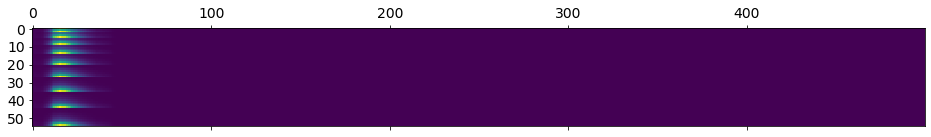

In [57]:
plt.matshow(eedf.rate_const_matrix_e_inelas_molecule)

In [58]:
eedf.n_bg_molecule_elas

1

In [59]:
eedf.bg_molecule_elas

['CO']

In [60]:
eedf.n_bg_molecule_inelas

10

In [61]:
eedf.bg_molecule_inelas

array(['CO(v1)', 'CO(v10)', 'CO(v2)', 'CO(v3)', 'CO(v4)', 'CO(v5)', 'CO(v6)', 'CO(v7)', 'CO(v8)', 'CO(v9)'], dtype=object)

In [62]:
eedf.n_inelas_rctn

55

In [63]:
eedf.bg_molecule_inelas_in_order

array(['CO(v1)', 'CO(v2)', 'CO(v2)', 'CO(v3)', 'CO(v3)', 'CO(v3)', 'CO(v4)', 'CO(v4)', 'CO(v4)', 'CO(v4)', 'CO(v5)', 'CO(v5)',
       'CO(v5)', 'CO(v5)', 'CO(v5)', 'CO(v6)', 'CO(v6)', 'CO(v6)', 'CO(v6)', 'CO(v6)', 'CO(v6)', 'CO(v7)', 'CO(v7)', 'CO(v7)',
       'CO(v7)', 'CO(v7)', 'CO(v7)', 'CO(v7)', 'CO(v8)', 'CO(v8)', 'CO(v8)', 'CO(v8)', 'CO(v8)', 'CO(v8)', 'CO(v8)', 'CO(v8)',
       'CO(v9)', 'CO(v9)', 'CO(v9)', 'CO(v9)', 'CO(v9)', 'CO(v9)', 'CO(v9)', 'CO(v9)', 'CO(v9)', 'CO(v10)', 'CO(v10)', 'CO(v10)',
       'CO(v10)', 'CO(v10)', 'CO(v10)', 'CO(v10)', 'CO(v10)', 'CO(v10)', 'CO(v10)'], dtype=object)

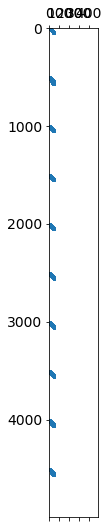

In [64]:
plt.spy(eedf.rate_const_matrix_e_inelas_electron, markersize=2)

In [65]:
eedf.rate_const_matrix_e_inelas_molecule

array([[5.7e-36, 1.7e-35, 1.5e-35, 1.6e-35, 1.6e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [5.4e-36, 1.5e-35, 1.3e-35, 1.2e-35, 1.2e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [5.7e-36, 1.7e-35, 1.5e-35, 1.6e-35, 1.6e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [4.2e-36, 1.2e-35, 9.7e-36, 8.7e-36, 8.4e-36, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [5.4e-36, 1.5e-35, 1.3e-35, 1.2e-35, 1.2e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       ...,
       [1.9e-36, 5.1e-36, 4.1e-36, 3.6e-36, 3.4e-36, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [2.8e-36, 7.6e-36, 6.2e-36, 5.5e-36, 5.3e-36, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [3.9e-36, 1.1e-35, 9.0e-36, 8.2e-36, 7.9e-36, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [5.0e-36, 1.4e-35, 1.2e-35, 1.2e-35, 1.1e-35, ..., 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00, 0.0e+00],
       [5.3e-36, 1.5e-35, 1.4e-35, 1.5e-35, 1.5e-35,

In [66]:
N = get_ideal_gas_density(p_Pa=1e5, Tgas_K=1000)
N

7.242973087680333e+24

### Set parameters

In [67]:
eedf.set_parameters(E=2e5, Tgas=1000, N=N)

In [68]:
total_species_density = np.ones(12) * N
# total_species_density = np.array([0,1,0,0,0])*N
def dndt_all(t, y):
    eedf.set_density_per_J(y)
    eedf.set_flux(total_species_density=total_species_density)
    return eedf.get_deriv_total(total_species_density=total_species_density) 

In [69]:
y0 = get_maxwell_eedf(eedf.energy_point, Te_eV=0.7)*1e20
time_span = [0, 1e3]
sol = solve_ivp(dndt_all, time_span, y0, method="BDF", rtol=5e-2)

In [70]:
sol.t

array([0.0e+00, 8.1e-15, 1.6e-14, 9.7e-14, 1.8e-13, 4.2e-13, 6.7e-13, 9.1e-13, 1.2e-12, 1.5e-12, 1.8e-12, 2.1e-12, 2.6e-12,
       3.1e-12, 3.6e-12, 4.6e-12, 5.6e-12, 6.6e-12, 8.4e-12, 1.0e-11, 1.2e-11, 1.5e-11, 1.8e-11, 2.1e-11, 2.4e-11, 2.8e-11,
       3.3e-11, 3.7e-11, 4.1e-11, 4.7e-11, 5.2e-11, 5.8e-11, 6.3e-11, 7.0e-11, 7.6e-11, 8.3e-11, 8.9e-11, 9.6e-11, 1.0e-10,
       1.1e-10, 1.2e-10, 1.3e-10, 1.3e-10, 1.4e-10, 1.5e-10, 1.6e-10, 1.7e-10, 1.8e-10, 1.8e-10, 1.9e-10, 2.0e-10, 2.1e-10,
       2.2e-10, 2.2e-10, 2.3e-10, 2.4e-10, 2.5e-10, 2.5e-10, 2.6e-10, 2.6e-10, 2.8e-10, 2.8e-10, 2.9e-10, 3.0e-10, 3.1e-10,
       3.1e-10, 3.2e-10, 3.3e-10, 3.3e-10, 3.4e-10, 3.5e-10, 3.6e-10, 3.7e-10, 3.8e-10, 3.9e-10, 3.9e-10, 4.0e-10, 4.1e-10,
       4.2e-10, 4.3e-10, 4.4e-10, 4.4e-10, 4.5e-10, 4.6e-10, 4.7e-10, 4.7e-10, 4.8e-10, 4.9e-10, 4.9e-10, 5.0e-10, 5.1e-10,
       5.2e-10, 5.3e-10, 5.4e-10, 5.5e-10, 5.6e-10, 5.7e-10, 5.8e-10, 5.9e-10, 6.0e-10, 6.1e-10, 6.2e-10, 6.2e-10, 6.3e-10,
       6

In [71]:
len(sol.t)

161

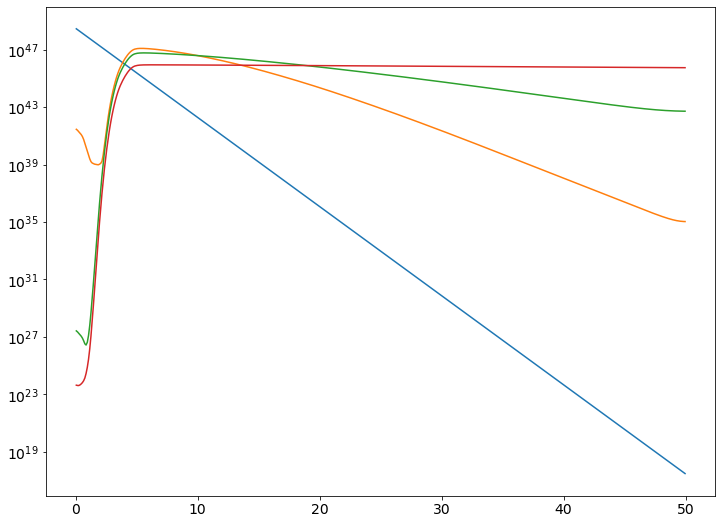

In [72]:
plt.semilogy(eedf.energy_point_eV, (sol.y.transpose()/np.sqrt(eedf.energy_point)).transpose()[:,::50])

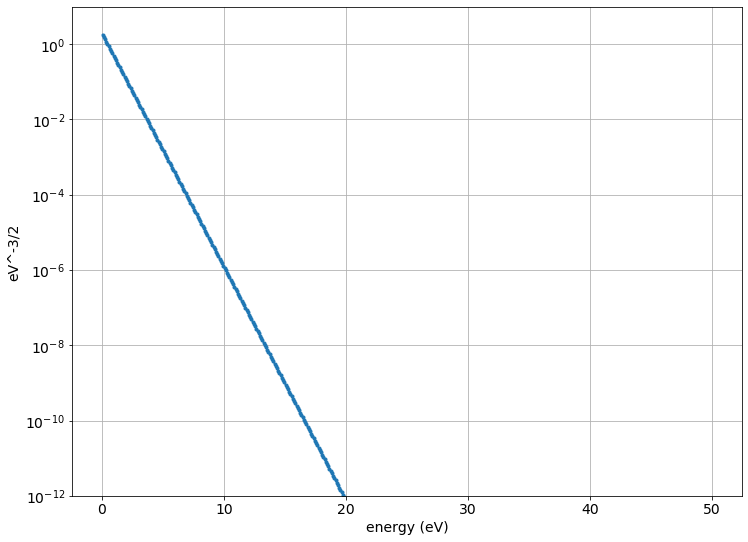

In [73]:
eedf.set_density_per_J(sol.y[:,0])
eedf.plot_normalized_eepf()

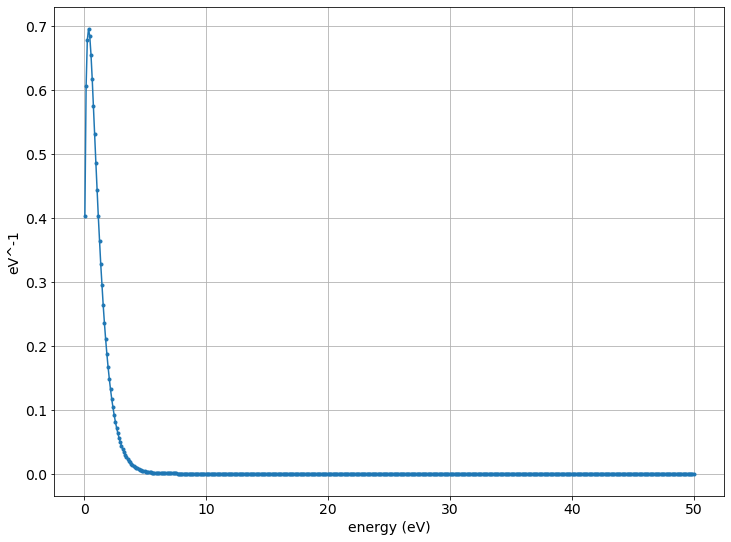

In [74]:
eedf.plot_normalized_eedf()

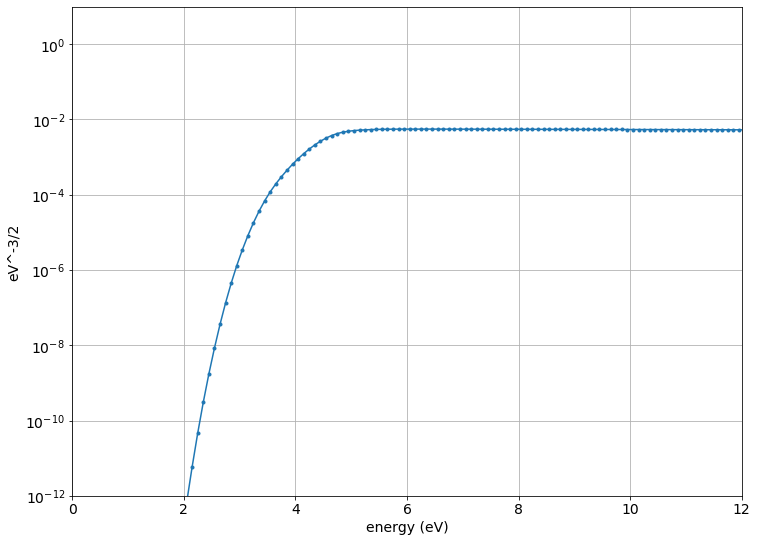

In [75]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.plot_normalized_eepf(xlim=(0,12), ylim=(1e-12, 1e1))

In [76]:
print(eedf)


        
        
               ENERGY SPACE (eV) : (0.0, 50.0)
        
     NUMBER OF DISCRETIZED CELLS : 500 cells
        
            ENERGY INTERVAL (eV) : 0.100 
        
        
            ELECTRON TEMPERATURE : 19.3604 eV
        
            ELECTRON MEAN ENERGY : 29.0407 eV
        
                ELECTRON DENSITY : 1.00e+20 m^-3
        
        
              ELECTRIC FIELD (E) : 200000 V/m (2.00 kV/cm) 
        
          GAS TEMPERATURE (Tgas) : 1000 K
        
 BACKGROUND MOLECULE DENSITY (N) : 7.2e+24 m^-3
        
    REDUCED ELECTRIC FIELD (E/N) : 27.6 Td
        
        
     ELASTIC COLLISION MOLECULES : ['CO']
        
   INELASTIC COLLISION MOLECULES : ['CO(v1)' 'CO(v10)' 'CO(v2)' 'CO(v3)' 'CO(v4)' 'CO(v5)' 'CO(v6)' 'CO(v7)' 'CO(v8)' 'CO(v9)']
        


In [77]:
eedf._get_molecule_rate_const_e_inelas()

array([4.1e-18, 2.4e-18, 4.1e-18, 1.4e-18, 2.4e-18, 4.1e-18, 8.0e-19, 1.4e-18, 2.4e-18, 4.1e-18, 4.6e-19, 8.0e-19, 1.4e-18,
       2.4e-18, 4.1e-18, 2.7e-19, 4.6e-19, 8.0e-19, 1.4e-18, 2.4e-18, 4.1e-18, 1.5e-19, 2.6e-19, 4.6e-19, 8.0e-19, 1.4e-18,
       2.4e-18, 4.1e-18, 8.7e-20, 1.5e-19, 2.6e-19, 4.6e-19, 8.0e-19, 1.4e-18, 2.4e-18, 4.1e-18, 5.0e-20, 8.6e-20, 1.5e-19,
       2.6e-19, 4.6e-19, 7.9e-19, 1.4e-18, 2.4e-18, 4.1e-18, 2.8e-20, 4.9e-20, 8.6e-20, 1.5e-19, 2.6e-19, 4.6e-19, 7.9e-19,
       1.4e-18, 2.4e-18, 4.1e-18])

[Text(0, 0, 'E + CO(v1) => E + CO'),
 Text(0, 0, 'E + CO(v2) => E + CO'),
 Text(0, 0, 'E + CO(v2) => E + CO(v1)'),
 Text(0, 0, 'E + CO(v3) => E + CO'),
 Text(0, 0, 'E + CO(v3) => E + CO(v1)'),
 Text(0, 0, 'E + CO(v3) => E + CO(v2)'),
 Text(0, 0, 'E + CO(v4) => E + CO'),
 Text(0, 0, 'E + CO(v4) => E + CO(v1)'),
 Text(0, 0, 'E + CO(v4) => E + CO(v2)'),
 Text(0, 0, 'E + CO(v4) => E + CO(v3)'),
 Text(0, 0, 'E + CO(v5) => E + CO'),
 Text(0, 0, 'E + CO(v5) => E + CO(v1)'),
 Text(0, 0, 'E + CO(v5) => E + CO(v2)'),
 Text(0, 0, 'E + CO(v5) => E + CO(v3)'),
 Text(0, 0, 'E + CO(v5) => E + CO(v4)'),
 Text(0, 0, 'E + CO(v6) => E + CO'),
 Text(0, 0, 'E + CO(v6) => E + CO(v1)'),
 Text(0, 0, 'E + CO(v6) => E + CO(v2)'),
 Text(0, 0, 'E + CO(v6) => E + CO(v3)'),
 Text(0, 0, 'E + CO(v6) => E + CO(v4)'),
 Text(0, 0, 'E + CO(v6) => E + CO(v5)'),
 Text(0, 0, 'E + CO(v7) => E + CO'),
 Text(0, 0, 'E + CO(v7) => E + CO(v1)'),
 Text(0, 0, 'E + CO(v7) => E + CO(v2)'),
 Text(0, 0, 'E + CO(v7) => E + CO(v3)'),
 Te

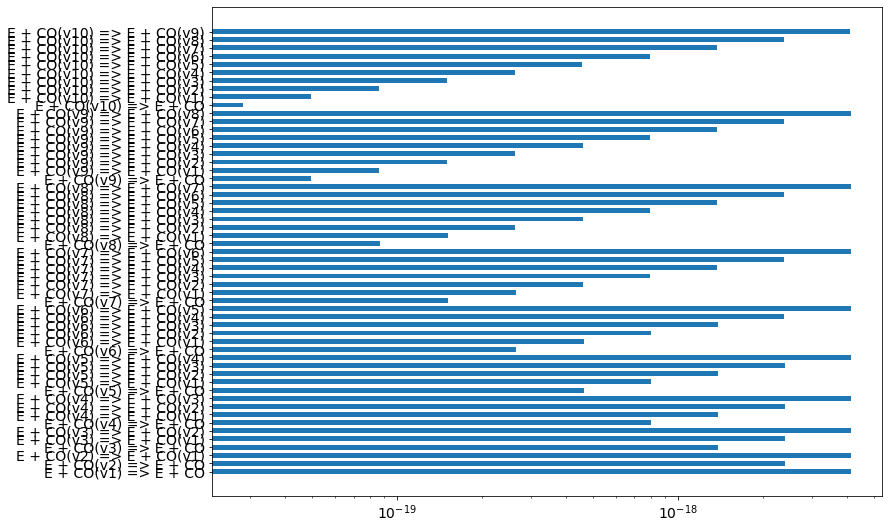

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(range(eedf.n_inelas_rctn),
        width=eedf._get_molecule_rate_const_e_inelas(),
        height=0.6, log=True)
ax.set_yticks(range(eedf.n_inelas_rctn))
ax.set_yticklabels(eedf.inelas_reaction_dataframe['formula'])

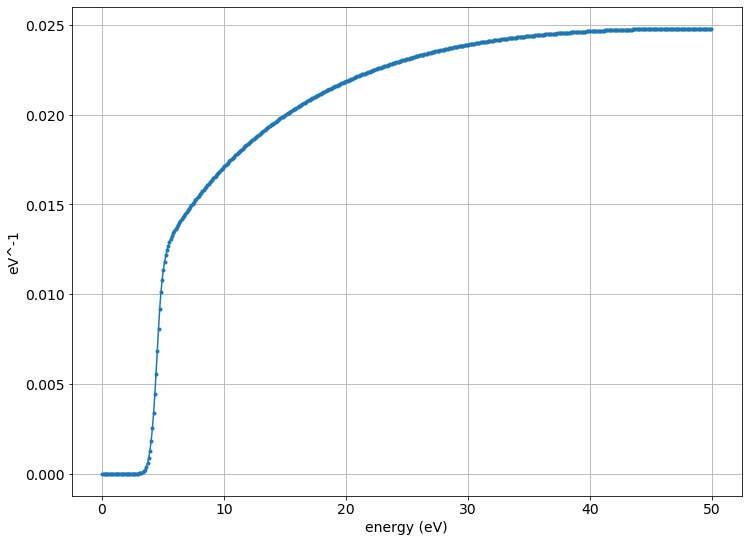

In [79]:
eedf.plot_normalized_eedf()

Text(0.5, 1.0, 'Te vs. t')

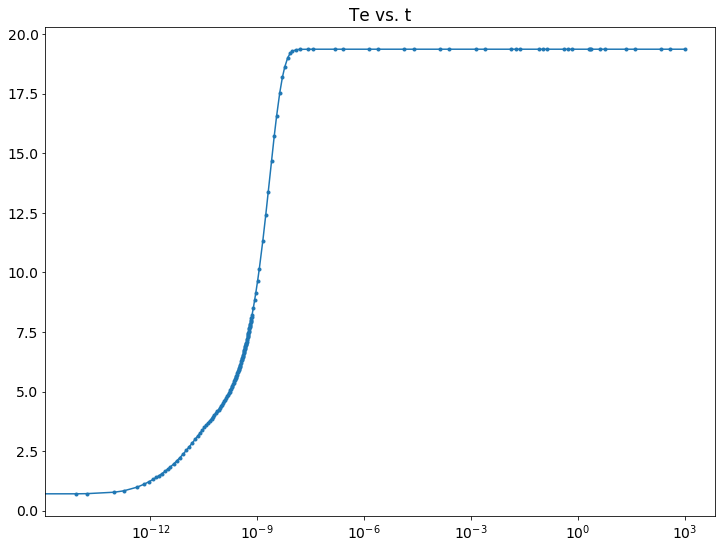

In [80]:
Te_seq = []
ne_seq = []
for _array in sol.y.transpose():
    eedf.set_density_per_J(_array)
    Te_seq.append(eedf.electron_temperature_in_eV)
    ne_seq.append(eedf.electron_density)
plt.semilogx(sol.t, Te_seq, marker='.')
plt.title("Te vs. t")

Text(0.5, 1.0, 'ne vs. t')

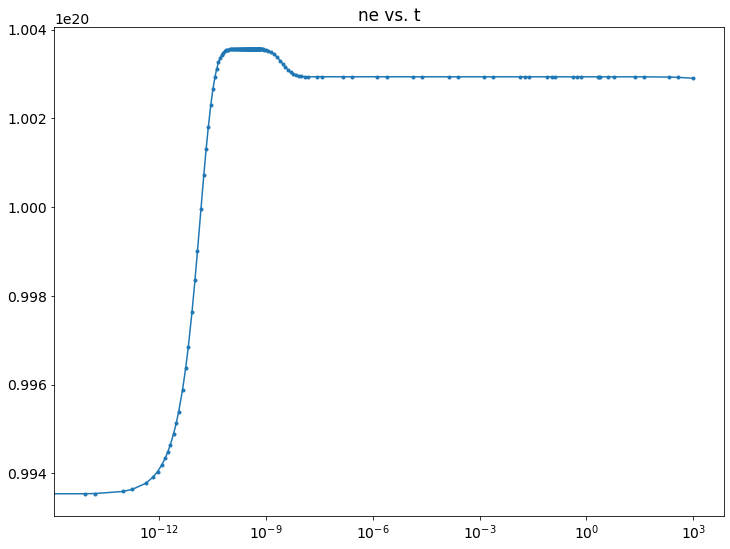

In [81]:
plt.semilogx(sol.t, ne_seq, marker='.')
plt.title("ne vs. t")

In [82]:
sol.y

array([[2.5e+38, 2.5e+38, 2.5e+38, 2.5e+38, 2.5e+38, ..., 3.9e+13, 3.9e+13, 3.9e+13, 3.9e+13, 3.9e+13],
       [3.8e+38, 3.8e+38, 3.8e+38, 3.7e+38, 3.7e+38, ..., 6.4e+13, 6.4e+13, 6.4e+13, 6.4e+13, 6.4e+13],
       [4.2e+38, 4.2e+38, 4.2e+38, 4.2e+38, 4.1e+38, ..., 8.3e+13, 8.3e+13, 8.3e+13, 8.3e+13, 8.3e+13],
       [4.3e+38, 4.3e+38, 4.3e+38, 4.3e+38, 4.3e+38, ..., 1.1e+14, 1.1e+14, 1.1e+14, 1.1e+14, 1.1e+14],
       [4.2e+38, 4.2e+38, 4.2e+38, 4.2e+38, 4.2e+38, ..., 1.4e+14, 1.4e+14, 1.4e+14, 1.4e+14, 1.4e+14],
       ...,
       [1.5e+09, 1.5e+09, 1.5e+09, 1.6e+09, 1.7e+09, ..., 1.6e+37, 1.6e+37, 1.6e+37, 1.6e+37, 1.6e+37],
       [1.3e+09, 1.3e+09, 1.3e+09, 1.4e+09, 1.5e+09, ..., 1.6e+37, 1.6e+37, 1.6e+37, 1.6e+37, 1.6e+37],
       [1.2e+09, 1.2e+09, 1.2e+09, 1.2e+09, 1.3e+09, ..., 1.6e+37, 1.6e+37, 1.6e+37, 1.6e+37, 1.6e+37],
       [1.0e+09, 1.0e+09, 1.0e+09, 1.1e+09, 1.2e+09, ..., 1.6e+37, 1.6e+37, 1.6e+37, 1.6e+37, 1.6e+37],
       [8.7e+08, 8.9e+08, 9.1e+08, 1.0e+09, 1.1e+09,

In [83]:
eedf.set_density_per_J(sol.y[:,-1])
eedf.set_flux(total_species_density=total_species_density)

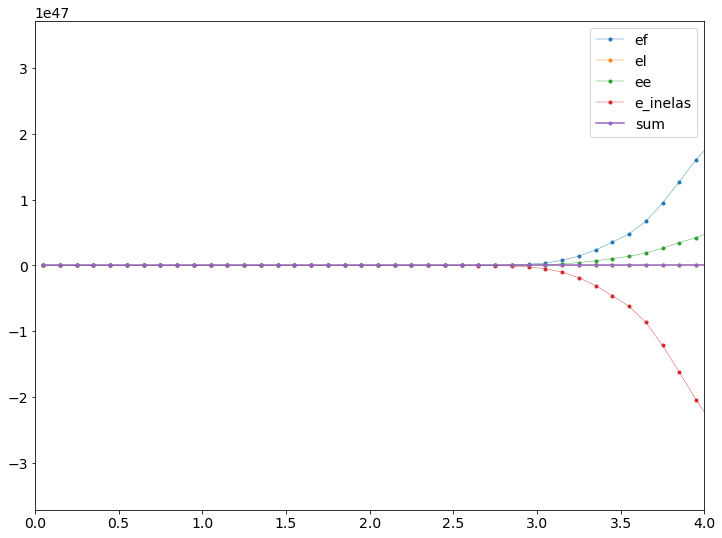

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ef(), 
        linewidth=0.4, marker='.', label='ef')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_el(), 
        linewidth=0.4, marker='.', label='el')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ee(), 
        linewidth=0.4, marker='.', label='ee')
ax.plot(eedf.energy_point_eV, eedf._get_electron_rate_e_inelas(density=total_species_density), 
        linewidth=0.4, marker='.', label='e_inelas')
ax.plot(eedf.energy_point_eV, eedf.get_deriv_total(total_species_density=total_species_density), 
        linewidth=1.5, marker='.', label='sum')
# ax.plot(eedf.energy_nodes,eedf.J_flux_el, marker='.', label='el')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ee, marker='.', label='ee')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ef+eedf.J_flux_el+eedf.J_flux_ee, marker='.', label='ef+el+ee')
# ax.set_yscale('symlog')
# ax.set_xscale('log')
ax.set_xlim((0,4))
ax.legend()

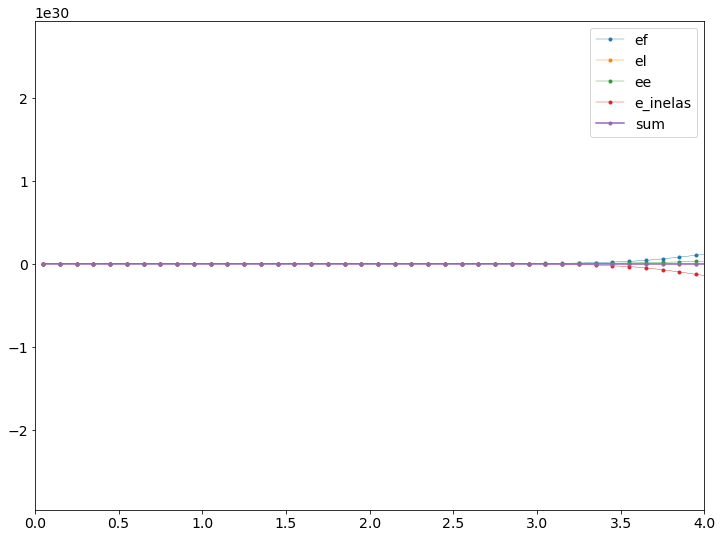

In [85]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ef()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='ef')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_el()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='el')
ax.plot(eedf.energy_point_eV, eedf._get_deriv_ee()*eedf.energy_point, 
        linewidth=0.4, marker='.', label='ee')
ax.plot(eedf.energy_point_eV, eedf._get_electron_rate_e_inelas(density=total_species_density)*eedf.energy_point, 
        linewidth=0.4, marker='.', label='e_inelas')
ax.plot(eedf.energy_point_eV, eedf.get_deriv_total(total_species_density=total_species_density)*eedf.energy_point, 
        linewidth=1.5, marker='.', label='sum')
# ax.plot(eedf.energy_nodes,eedf.J_flux_el, marker='.', label='el')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ee, marker='.', label='ee')
# ax.plot(eedf.energy_nodes,eedf.J_flux_ef+eedf.J_flux_el+eedf.J_flux_ee, marker='.', label='ef+el+ee')
# ax.set_yscale('symlog')
# ax.set_xscale('log')
ax.set_xlim((0,4))
ax.legend()

In [86]:
energy_gain_ef = (eedf._get_deriv_ef()*eedf.energy_point).sum()
energy_lose_el = (eedf._get_deriv_el()*eedf.energy_point).sum()
energy_gain_ee = (eedf._get_deriv_ee()*eedf.energy_point).sum()
energy_gain_e_inelas = (eedf._get_electron_rate_e_inelas(density=total_species_density)*eedf.energy_point).sum()
energy_gain_net = (eedf.get_deriv_total(total_species_density=total_species_density)*eedf.energy_point).sum()

Text(0.5, 1.0, 'energy lose')

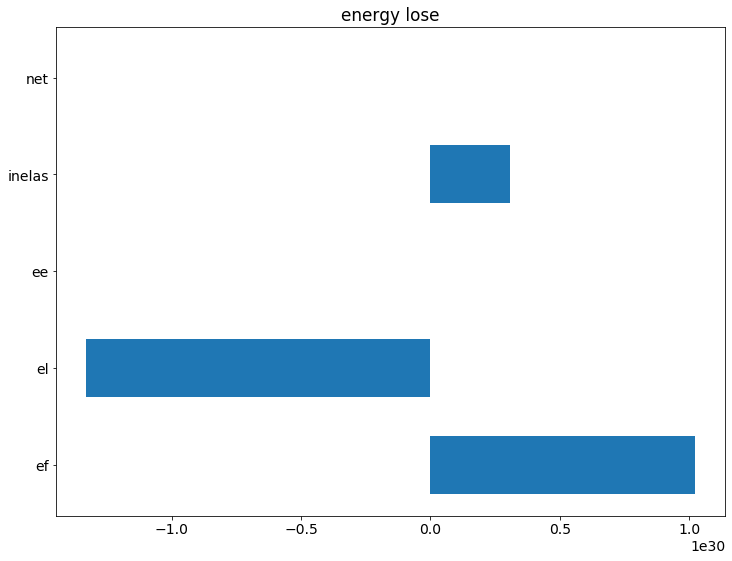

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(range(5),
        width=[energy_gain_ef, energy_lose_el, energy_gain_ee, energy_gain_e_inelas, energy_gain_net],
       height=0.6)
ax.set_yticks(range(5))
ax.set_yticklabels(['ef', 'el', 'ee', 'inelas', 'net'])
ax.set_title("energy lose")

In [88]:
eedf.inelas_rctn_info

formula          type  threshold_eV  rate const  \
0        E + CO(v1) => E + CO  deexcitation      -2.7e-01     4.1e-18   
1        E + CO(v2) => E + CO  deexcitation      -5.3e-01     2.4e-18   
2    E + CO(v2) => E + CO(v1)  deexcitation      -2.6e-01     4.1e-18   
3        E + CO(v3) => E + CO  deexcitation      -7.9e-01     1.4e-18   
4    E + CO(v3) => E + CO(v1)  deexcitation      -5.2e-01     2.4e-18   
5    E + CO(v3) => E + CO(v2)  deexcitation      -2.6e-01     4.1e-18   
6        E + CO(v4) => E + CO  deexcitation      -1.0e+00     8.0e-19   
7    E + CO(v4) => E + CO(v1)  deexcitation      -7.8e-01     1.4e-18   
8    E + CO(v4) => E + CO(v2)  deexcitation      -5.1e-01     2.4e-18   
9    E + CO(v4) => E + CO(v3)  deexcitation      -2.6e-01     4.1e-18   
10       E + CO(v5) => E + CO  deexcitation      -1.3e+00     4.6e-19   
11   E + CO(v5) => E + CO(v1)  deexcitation      -1.0e+00     8.0e-19   
12   E + CO(v5) => E + CO(v2)  deexcitation      -7.7e-01     1.4e-18   
13   E + CO(v5) => E + CO(v3)  deexcitation      -5.1e-01     2.4e-18   
14   E + CO(v5) => E + CO(v4)  deexcitation      -2.5e-01     4.1e-18   
15       E + CO(v6) => E + CO  deexcitation      -1.5e+00     2.7e-19   
16   E + CO(v6) => E + CO(v1)  deexcitation      -1.3e+00     4.6e-19   
17   E + CO(v6) => E + CO(v2)  deexcitation      -1.0e+00     8.0e-19   
18   E + CO(v6) => E + CO(v3)  deexcitation      -7.6e-01     1.4e-18   
19   E + CO(v6) => E + CO(v4)  deexcitation      -5.0e-01     2.4e-18   
20   E + CO(v6) => E + CO(v5)  deexcitation      -2.5e-01     4.1e-18   
21       E + CO(v7) => E + CO  deexcitation      -1.8e+00     1.5e-19   
22   E + CO(v7) => E + CO(v1)  deexcitation      -1.5e+00     2.6e-19   
23   E + CO(v7) => E + CO(v2)  deexcitation      -1.3e+00     4.6e-19   
24   E + CO(v7) => E + CO(v3)  deexcitation      -1.0e+00     8.0e-19   
25   E + CO(v7) => E + CO(v4)  deexcitation      -7.5e-01     1.4e-18   
26   E + CO(v7) => E + CO(v5)  deexcitation      -5.0e-01     2.4e-18   
27   E + CO(v7) => E + CO(v6)  deexcitation      -2.5e-01     4.1e-18   
28       E + CO(v8) => E + CO  deexcitation      -2.0e+00     8.7e-20   
29   E + CO(v8) => E + CO(v1)  deexcitation      -1.8e+00     1.5e-19   
30   E + CO(v8) => E + CO(v2)  deexcitation      -1.5e+00     2.6e-19   
31   E + CO(v8) => E + CO(v3)  deexcitation      -1.2e+00     4.6e-19   
32   E + CO(v8) => E + CO(v4)  deexcitation      -9.9e-01     8.0e-19   
33   E + CO(v8) => E + CO(v5)  deexcitation      -7.4e-01     1.4e-18   
34   E + CO(v8) => E + CO(v6)  deexcitation      -4.9e-01     2.4e-18   
35   E + CO(v8) => E + CO(v7)  deexcitation      -2.4e-01     4.1e-18   
36       E + CO(v9) => E + CO  deexcitation      -2.3e+00     5.0e-20   
37   E + CO(v9) => E + CO(v1)  deexcitation      -2.0e+00     8.6e-20   
38   E + CO(v9) => E + CO(v2)  deexcitation      -1.7e+00     1.5e-19   
39   E + CO(v9) => E + CO(v3)  deexcitation      -1.5e+00     2.6e-19   
40   E + CO(v9) => E + CO(v4)  deexcitation      -1.2e+00     4.6e-19   
41   E + CO(v9) => E + CO(v5)  deexcitation      -9.8e-01     7.9e-19   
42   E + CO(v9) => E + CO(v6)  deexcitation      -7.3e-01     1.4e-18   
43   E + CO(v9) => E + CO(v7)  deexcitation      -4.8e-01     2.4e-18   
44   E + CO(v9) => E + CO(v8)  deexcitation      -2.4e-01     4.1e-18   
45      E + CO(v10) => E + CO  deexcitation      -2.5e+00     2.8e-20   
46  E + CO(v10) => E + CO(v1)  deexcitation      -2.2e+00     4.9e-20   
47  E + CO(v10) => E + CO(v2)  deexcitation      -2.0e+00     8.6e-20   
48  E + CO(v10) => E + CO(v3)  deexcitation      -1.7e+00     1.5e-19   
49  E + CO(v10) => E + CO(v4)  deexcitation      -1.5e+00     2.6e-19   
50  E + CO(v10) => E + CO(v5)  deexcitation      -1.2e+00     4.6e-19   
51  E + CO(v10) => E + CO(v6)  deexcitation      -9.6e-01     7.9e-19   
52  E + CO(v10) => E + CO(v7)  deexcitation      -7.2e-01     1.4e-18   
53  E + CO(v10) => E + CO(v8)  deexcitation      -4.8e-01     2.4e-18   
54  E +

In [89]:
eedf.inelas_rctn_info.so

AttributeError: 'DataFrame' object has no attribute 'so'